# CUSTOMER SEGMENTATION MACHINE LEARNING MODEL

**Table Of Contents**



1.  Import Necessary Libraries
2.  Loading Dataset
3.  Data Cleaning
4.  Exploratory Data Analysis(EDA)
5.  Feature Engineering
6.  Scaling
7.  Model Building
8.  Model evaluating
9.  Evaluating Segment Effectiveness









**Import** **Necessary** **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**Loading The Dataset**

In [ ]:
# 1) data loading
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

**Data Cleaning**

In [ ]:
# data cleaning
# Handle missing values, duplicates, and outliers in the dataset.

In [ ]:
#handling missing values

#finding missing values

#to find missing values we use isnull()

df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
#to find the count of missing values in column

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# to find the count of total missing values in dataframe

df.isnull().sum().sum()

136534

In [ ]:
#In description column there are some missing values so we use dropna() and subset to remove those values

df.dropna(subset=['Description'], inplace = True)

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [ ]:
df.shape

(540455, 8)

In [ ]:
# In customer id column there are some missing values , here we use fillna() to fill those values for better understanding of data and analysis

#we use mean of the customerid to fill the missing values

df.dropna(subset=['CustomerID'], inplace = True)

In [ ]:
df.isnull().sum()
df.shape

(406829, 8)

In [ ]:
# handling duplicate values

# indentifying total number duplicate values we duplicated().sum()

df.duplicated().sum()

5225

In [ ]:
# to remove the duplicate values we drop_duplicates()

df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(401604, 8)

In [ ]:
# Handling negative values in columns like quantity and unit price

# To identify negatice values

# Identify rows with negative 'Quantity' values

negative_quantity = df[df['Quantity'] < 0 ]
print("Rows with negative 'Quantity' values:")
print(negative_quantity)

# Identify rows with negative 'UnitPrice' values

negative_quantity = df[df['UnitPrice'] < 0   ]
print("Rows with negative 'UnitPrice' values:")
print(negative_quantity)


Rows with negative 'Quantity' values:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141  

In [ ]:
# To remove the negative 'Quantity' values

df.drop(df[df['Quantity'] < 0].index, inplace=True)
print("DataFrame after removing negative 'Quantity' values using inplace=True:")
print(df)



DataFrame after removing negative 'Quantity' values using inplace=True:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

   

In [ ]:
# To remove the negative 'UnitPrice' values

df.drop(df[df['UnitPrice']<0].index,inplace = True)
print('DataFrame after removing negative UnitPrice values')
print(df)

DataFrame after removing negative UnitPrice values
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDa

In [ ]:
df['StockCode'] = df['StockCode'].astype(str)

alphanumeric_mask = df['StockCode'].str.contains(r'^(?=.*\d)(?=.*[A-Za-z]).+$', na=False)
print("Rows with alphanumeric InvoiceNo:")
print(df[alphanumeric_mask])

# Drop rows with alphanumeric InvoiceNo using inplace=True
df.drop(index=df[alphanumeric_mask].index, inplace=True)
print("DataFrame after removing rows with alphanumeric InvoiceNo:")
print(df)


Rows with alphanumeric InvoiceNo:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
49        536373    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
...          ...       ...                                  ...       ...   
541778    581578    84997C      CHILDRENS CUTLERY POLKADOT BLUE         8   
541809    581579    85099C       JUMBO  BAG BAROQUE BLACK WHITE        10   
541838    581580    84993A            75 GREEN PETIT FOUR CASES         2   
541844    581580    85049A        TRADITIONAL CHRISTMAS RIBBONS         1   
541853    581580    85049E            SCANDINAVIAN REDS RIBBONS         2   

               InvoiceDate  UnitPrice  Cu

In [ ]:
# Handling outliers

# To detect outliers and remove them  from dataset

In [ ]:

# Convert 'Quantity' and 'UnitPrice' columns to numeric, forcing non-numeric values to NaN

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Function to detect outliers using Z-score with threshold 3
def detect_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = np.abs((df[column] - mean) / std_dev)
    outliers = df[z_scores > threshold]
    return outliers


outliers_Quantity_zscore = detect_outliers_zscore(df, 'Quantity')
print("Outliers in column 'Quantity' (Z-score method with threshold 3):")
print(outliers_Quantity_zscore)

outliers_UnitPrice_zscore = detect_outliers_zscore(df, 'UnitPrice')
print("Outliers in column 'UnitPrice' (Z-score method with threshold 3):")
print(outliers_UnitPrice_zscore)

# Remove outliers in place
df.drop(outliers_Quantity_zscore.index, inplace=True)
df.drop(outliers_UnitPrice_zscore.index, inplace=True)

print("DataFrame after removing outliers:")
print(df)





Outliers in column 'Quantity' (Z-score method with threshold 3):
       InvoiceNo StockCode                        Description  Quantity  \
730       536437     17021             NAMASTE SWAGAT INCENSE       600   
3917      536736     22616         PACK OF 12 LONDON TISSUES        600   
4850      536809     84950     ASSORTED COLOUR T-LIGHT HOLDER      1824   
4945      536830     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
4946      536830     21915             RED  HARMONICA IN BOX       1400   
...          ...       ...                                ...       ...   
537883    581375     21137           BLACK RECORD COVER FRAME       960   
540061    581457     23543                WALL ART KEEP CALM        698   
540070    581458     22197                     POPCORN HOLDER      1500   
540071    581459     22197                     POPCORN HOLDER      1200   
540421    581483     23843        PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPr

In [ ]:
# Handling Outliers In date column

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


start_date = '2010-12-01'
end_date = '2011-12-09'

date_outliers = df[(df['InvoiceDate'] < start_date) | (df['InvoiceDate'] > end_date)]
print("Date outliers:")
print(date_outliers)


Date outliers:
       InvoiceNo StockCode                          Description  Quantity  \
540277    581475     22596  CHRISTMAS STAR WISH LIST CHALKBOARD        36   
540278    581475     23235             STORAGE TIN VINTAGE LEAF        12   
540279    581475     23272    TREE T-LIGHT HOLDER WILLIE WINKIE        12   
540280    581475     23239    SET OF 4 KNICK KNACK TINS POPPIES         6   
540281    581475     21705              BAG 500g SWIRLY MARBLES        24   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Co

In [ ]:
df.shape

(359192, 8)



**Exploratory Data Analysis (EDA)**

In [ ]:
# Exploratory data analysis(EDA)

# Descriptive Statistics

df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,359192.000000,359192,359192.000000,359192.000000
mean,11.917590,2011-07-12 13:48:00.214314752,2.892843,15281.188456
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-10 11:35:00,1.250000,13931.000000
50%,6.000000,2011-08-02 14:21:00,1.790000,15147.000000
75%,12.000000,2011-10-21 12:08:00,3.750000,16788.000000
max,576.000000,2011-12-09 12:50:00,65.000000,18287.000000
std,27.114333,NaN,3.138267,1715.830181


In [ ]:
# Segmenating customers based on RFM
# Recency(R): number of days since last purchase
# Frequency(F): Number of transcations
# Monetary(M): Total amount of transcations (revenue)

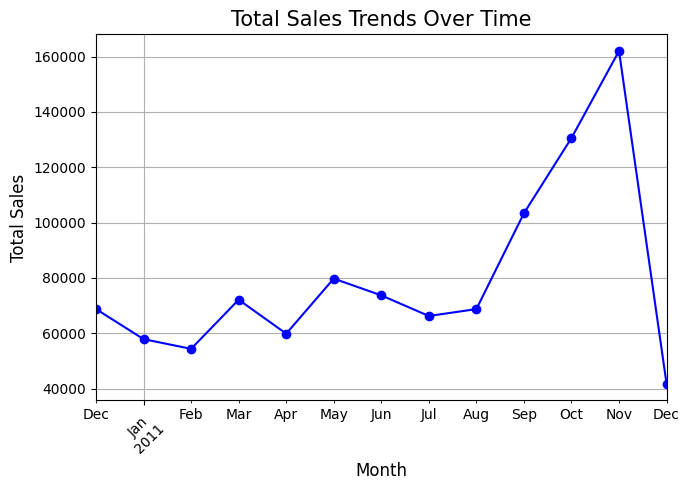

In [ ]:
# Recency

# Visualizing sales trends over time

# TotalSales over time

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth')['UnitPrice'].sum()

# Plotting
plt.figure(figsize=(7, 5))
monthly_sales.plot(marker='o', linestyle='-', color='b')
plt.title('Total Sales Trends Over Time', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
maxdate = max(df['InvoiceDate'])
maxdate

Timestamp('2011-12-09 12:50:00')

In [ ]:
df['diff'] = maxdate - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,diff
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373 days 04:24:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,373 days 04:24:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,373 days 04:24:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00


In [ ]:
# Computing the recency of customer

rfm_r = df.groupby('CustomerID')['diff'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,diff
0,12347.0,1 days 20:58:00
1,12348.0,74 days 23:37:00
2,12349.0,18 days 02:59:00
3,12350.0,309 days 20:49:00
4,12352.0,35 days 22:13:00


In [ ]:
# Frequency

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12347.0,162
1,12348.0,31
2,12349.0,68
3,12350.0,14
4,12352.0,81


In [ ]:
# Monetary

df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12347.0,3653.45
1,12348.0,1797.24
2,12349.0,1372.42
3,12350.0,298.00
4,12352.0,1653.24


In [ ]:
# merging two dfs

rfm = pd.merge(rfm_m,rfm_f,on = 'CustomerID',how = 'inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12347.0,3653.45,162
1,12348.0,1797.24,31
2,12349.0,1372.42,68
3,12350.0,298.00,14
4,12352.0,1653.24,81


In [ ]:
# Merging df to get final rfm df

rfm = pd.merge(rfm,rfm_r,on='CustomerID',how='inner')
rfm.columns = ('CustomerID','Amount','Frequency','Recency')
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12347.0,3653.45,162,1 days 20:58:00
1,12348.0,1797.24,31,74 days 23:37:00
2,12349.0,1372.42,68,18 days 02:59:00
3,12350.0,298.00,14,309 days 20:49:00
4,12352.0,1653.24,81,35 days 22:13:00


Text(0, 0.5, 'range')

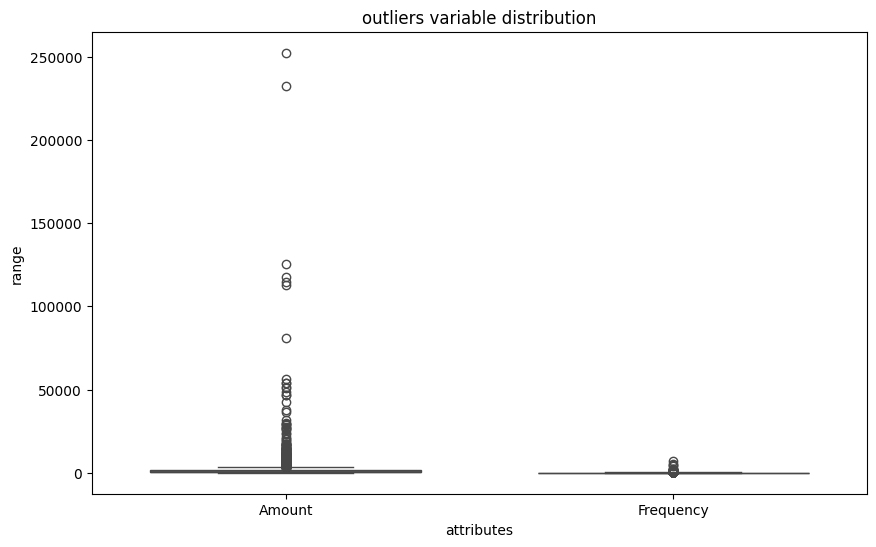

In [ ]:
# Outliers Analysis of amount , frequency

attributes = ['Amount','Frequency']
plt.rcParams['figure.figsize']=[10,6]
sns.boxplot(data=rfm[attributes],orient='v',palette='Set1',whis=1.5,saturation=1,width=0.7)
plt.title('outliers variable distribution',fontsize=12)
plt.xlabel('attributes',fontsize=10)
plt.ylabel('range',fontsize=10)

<ipython-input-45-f779bb26e155>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_revenue.values, y=top_countries_revenue.index, palette='Set2')


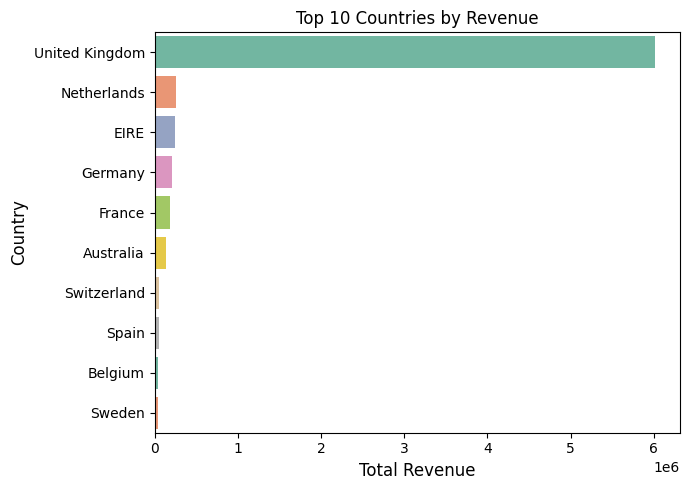

In [ ]:
# Visualizing Product analysis

# Bar Chart for Top-Selling Products by Revenue

df['Revenue'] = df['Quantity'] * df['UnitPrice']
top_countries_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plotting bargraph
plt.figure(figsize=(7,5))
sns.barplot(x=top_countries_revenue.values, y=top_countries_revenue.index, palette='Set2')
plt.title('Top 10 Countries by Revenue', fontsize=12)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()




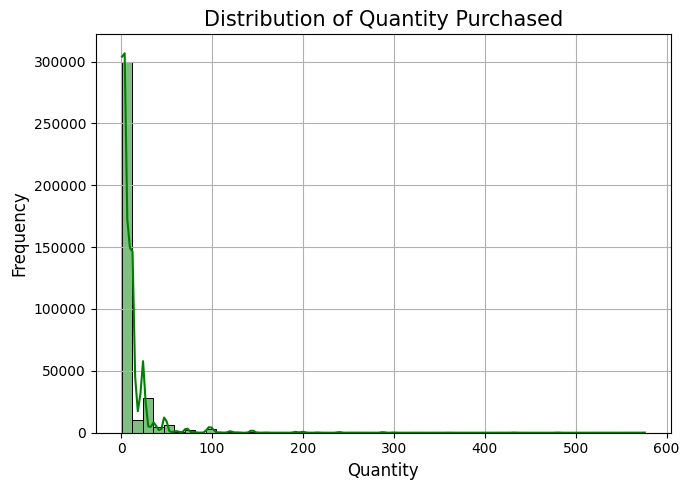

In [ ]:
# Plotting histogram for Quantity
plt.figure(figsize=(7, 5))
sns.histplot(df['Quantity'], bins=50, kde=True, color='green')
plt.title('Distribution of Quantity Purchased', fontsize=15)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()





**Feature Engineering**

In [ ]:
# Feature Engineeering invloves in these below mentioned process:

# 1) Creating new features

# 2) Encoding categorical variables

In [ ]:
# Creating New features

# Date Feature:

# Extracting day of the week from 'InvoiceDate'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Extracting month from 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

# Aggregated features:

# Total sales (Quantity * UnitPrice)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,diff,Amount,Revenue,DayOfWeek,Month,TotalSales
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373 days 04:24:00,20.34,20.34,2,12,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,373 days 04:24:00,15.30,15.30,2,12,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,373 days 04:24:00,25.50,25.50,2,12,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00,11.10,11.10,2,12,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00,11.10,11.10,2,12,11.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,0 days 00:00:00,10.20,10.20,4,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,0 days 00:00:00,12.60,12.60,4,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,0 days 00:00:00,16.60,16.60,4,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,0 days 00:00:00,16.60,16.60,4,12,16.60


In [ ]:
# Encoding categorical Variables

# Label Encoding for 'Country' column
label_encoder = LabelEncoder()
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])



In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,diff,Amount,Revenue,DayOfWeek,Month,TotalSales,Country_Encoded
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373 days 04:24:00,20.34,20.34,2,12,20.34,35
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,373 days 04:24:00,15.30,15.30,2,12,15.30,35
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,373 days 04:24:00,25.50,25.50,2,12,25.50,35
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00,11.10,11.10,2,12,11.10,35
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00,11.10,11.10,2,12,11.10,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,0 days 00:00:00,10.20,10.20,4,12,10.20,13
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,0 days 00:00:00,12.60,12.60,4,12,12.60,13
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,0 days 00:00:00,16.60,16.60,4,12,16.60,13
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,0 days 00:00:00,16.60,16.60,4,12,16.60,13


In [ ]:
# Dropping unwanted columns

columns_to_drop = ['Description','TotalSales','Revenue']
df = df.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,diff,Amount,DayOfWeek,Month,Country_Encoded
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373 days 04:24:00,20.34,2,12,35
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,373 days 04:24:00,15.30,2,12,35
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,373 days 04:24:00,25.50,2,12,35
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00,11.10,2,12,35
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,373 days 04:22:00,11.10,2,12,35


***Scaling***

In [ ]:
# Scaling features

rfm['Recency'] = rfm['Recency'].dt.days
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
print(rfm_df_scaled.shape)


(4300, 3)


In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)

rfm_df_scaled.columns = ['Amount','Frequency','Recency']


**Model Building**

In [ ]:
# Model building with K-Means algorithm

kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
set(kmeans.labels_)

{0, 1, 2, 3}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

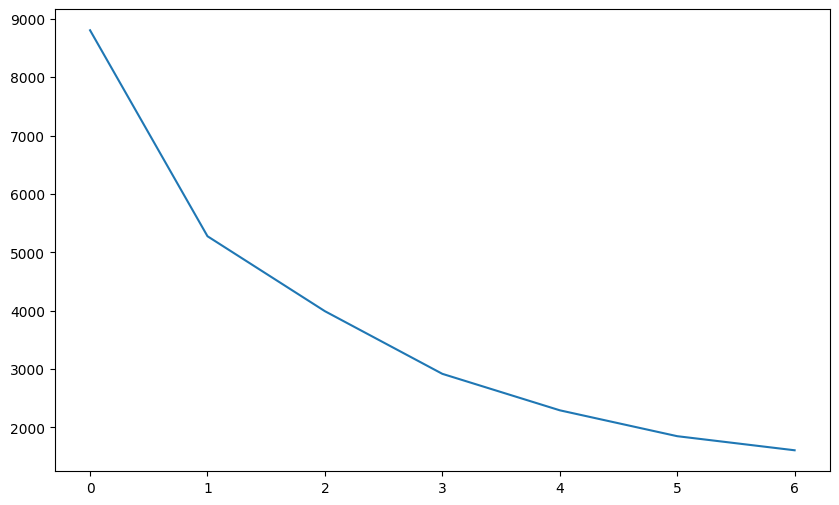

In [ ]:
# Using Elbow curve to get right number of clusters

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
  kmeans.fit(rfm_df_scaled)
  ssd.append(kmeans.inertia_)

plt.plot(ssd)

**Model** **Evaluation**

In [ ]:
# optimal number of cluster - 5

kmeans = KMeans(n_clusters=5,max_iter=300)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:

# Initializing the KMeans model with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_cluster_labels = kmeans.fit_predict(rfm_df_scaled)
rfm['Cluster'] = rfm_cluster_labels
print(rfm.head())
print("Cluster centers:\n", kmeans.cluster_centers_)

# To Calculate silhouette score

silhouette_avg = silhouette_score(rfm_df_scaled, rfm_cluster_labels)
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   CustomerID   Amount  Frequency  Recency  Cluster
0     12347.0  3653.45        162        1        1
1     12348.0  1797.24         31       74        1
2     12349.0  1372.42         68       18        1
3     12350.0   298.00         14      309        0
4     12352.0  1653.24         81       35        1
Cluster centers:
 [[-0.17974329 -0.28576921  1.56658236]
 [-0.07140662 -0.07616653 -0.48446468]
 [ 7.99334762 24.74903423 -0.9043756 ]
 [22.64149855  4.18183095 -0.83449985]
 [ 1.13558941  1.79851459 -0.79619078]]
Silhouette Score for 5 clusters: 0.616789623158014


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to calculate silhouette scores for different number of clusters
def find_optimal_clusters(data, cluster_range):
    silhouette_scores = []
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append((n_clusters, silhouette_avg))
        print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg}')
    return silhouette_scores

# Define the range of clusters to try
cluster_range = range(2, 12)
silhouette_scores = find_optimal_clusters(rfm_df_scaled, cluster_range)

# Find the number of clusters with the highest silhouette score
optimal_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print(f'The optimal number of clusters is {optimal_clusters}')

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_cluster_labels = kmeans.fit_predict(rfm_df_scaled)

# Add cluster labels to the dataframe
rfm['Cluster'] = rfm_cluster_labels
print(rfm.head())
print("Cluster centers:\n", kmeans.cluster_centers_)

# Calculate the final silhouette score
final_silhouette_avg = silhouette_score(rfm_df_scaled, rfm_cluster_labels)
print(f'Final Silhouette Score for {optimal_clusters} clusters: {final_silhouette_avg}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.9336222011638637


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.5997655222534507


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.5985095554212265


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.616789623158014


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.5853253934699294


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.5203394693099057


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.4835633753248135


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.4986443135624898


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 10 clusters: 0.484702960593759


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 11 clusters: 0.422413651043416
The optimal number of clusters is 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   CustomerID   Amount  Frequency  Recency  Cluster
0     12347.0  3653.45        162        1        0
1     12348.0  1797.24         31       74        0
2     12349.0  1372.42         68       18        0
3     12350.0   298.00         14      309        0
4     12352.0  1653.24         81       35        0
Cluster centers:
 [[-3.96818974e-02 -3.29338417e-02  2.44709566e-03]
 [ 1.41796647e+01  1.17683594e+01 -8.74428850e-01]]
Final Silhouette Score for 2 clusters: 0.9336222011638637


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


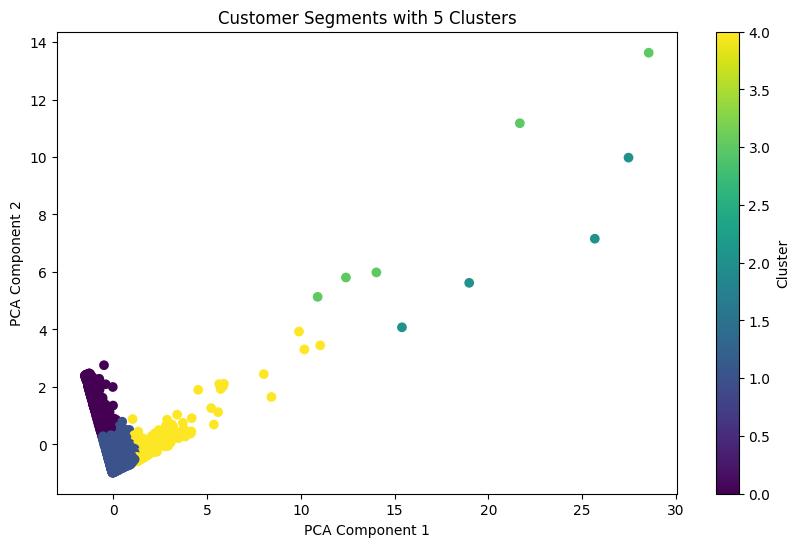

In [ ]:

#Applying PCA
pca = PCA(n_components=3)
rfm_pca = pca.fit_transform(rfm_df_scaled)

kmeans = KMeans(n_clusters=5, random_state=42)
rfm_cluster_labels = kmeans.fit_predict(rfm_pca)

# To Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm_cluster_labels, cmap='viridis', marker='o')
plt.title('Customer Segments with 5 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


**Evaluating segmentation effectiveness: Track metrics like Monitary,Frequency And Recency**

**segmenting customers based on RFM**





<ipython-input-68-7bbcb77969cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster'] = rfm_cluster_labels


Cluster Metrics:
   Cluster  CustomerID    Frequency         Amount     Recency
3        3           5   939.400000  165893.678000    8.000000
2        2           4  5148.750000   59686.127500    1.000000
4        4         228   451.622807    9963.421535   11.837719
1        1        3011    67.944537    1212.003518   43.065759
0        0        1052    25.046578     426.500134  248.535171

Clusters with low average amount spent (may require targeted strategies): []


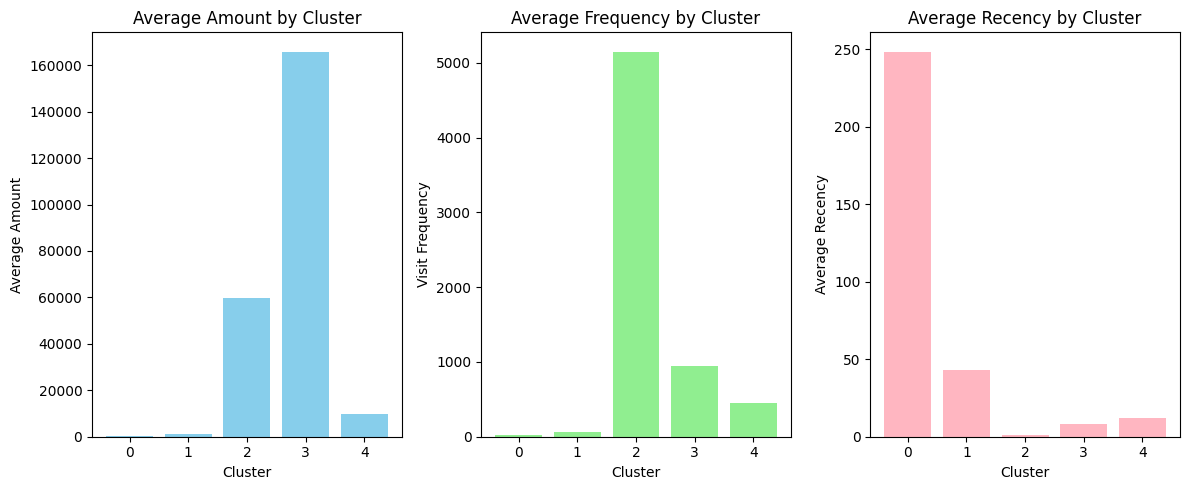

In [ ]:
# Segmenting Customers

rfm_df['Cluster'] = rfm_cluster_labels

cluster_metrics = rfm.groupby('Cluster').agg({
    'CustomerID': lambda x: x.nunique(),
    'Frequency': 'mean',
    'Amount': 'mean',
    'Recency': 'mean'
}).reset_index()

cluster_metrics_sorted = cluster_metrics.sort_values(by='Amount', ascending=False)

print("Cluster Metrics:")
print(cluster_metrics_sorted)

low_amount_clusters = cluster_metrics_sorted[cluster_metrics_sorted['Amount'] < 100]['Cluster'].tolist()
print("\nClusters with low average amount spent (may require targeted strategies):", low_amount_clusters)

# Plotting bar graphs

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(cluster_metrics_sorted['Cluster'], cluster_metrics_sorted['Amount'], color='skyblue')
plt.title('Average Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Amount')

plt.subplot(1, 3, 2)
plt.bar(cluster_metrics_sorted['Cluster'], cluster_metrics_sorted['Frequency'], color='lightgreen')
plt.title('Average Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Visit Frequency')

plt.subplot(1, 3, 3)
plt.bar(cluster_metrics_sorted['Cluster'], cluster_metrics_sorted['Recency'], color='lightpink')
plt.title('Average Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency')

plt.tight_layout()
plt.show()
